###IMPORTS

---





In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

###DATASET

---



In [4]:
dataset = pd.read_csv("spam.csv",
                      encoding="latin1")

In [5]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# get rid of unneccessary columns
dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],
          axis=1,
          inplace=True)

In [7]:
dataset.columns = ["labels", "text"]

In [8]:
dataset.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# change labels
data_labels = dataset["labels"].values
data_labels[data_labels == "spam"] = 1
data_labels[data_labels == "ham"] = 0

In [10]:
dataset.head()

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dataset["labels"].value_counts()

0    4825
1     747
Name: labels, dtype: int64

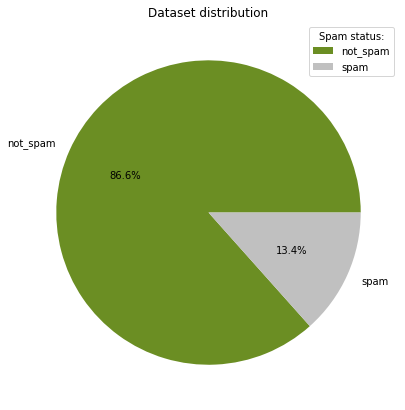

In [12]:
# check if the dataset is balanced
labels = ["not_spam", "spam"]
colors = ["olivedrab", "silver"]

plt.figure(figsize=(7,7))
plt.pie(dataset["labels"].value_counts(), labels=labels, colors=colors, autopct="%1.1f%%")
plt.legend(title = "Spam status")
plt.title("Dataset distribution")
plt.show()

###DATA PREPROCESSING

---



In [115]:
X = dataset["text"]
y = dataset["labels"]

In [116]:
X.shape

(5572,)

In [117]:
y.shape

(5572,)

**EMBEDDING**

---



In [118]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [119]:
embedded_data = tokenizer.texts_to_sequences(X)

**PADDING**

---



In [120]:
from keras.preprocessing.sequence import pad_sequences

# pad to the longest tweet in the dataset
max_length = max([len(text) for text in X])

X = pad_sequences(embedded_data,
                  value=0,
                  padding="post",
                  maxlen=max_length)

In [121]:
X[:5]

array([[  50,  469, 4410, ...,    0,    0,    0],
       [  46,  336, 1495, ...,    0,    0,    0],
       [  47,  486,    8, ...,    0,    0,    0],
       [   6,  245,  152, ...,    0,    0,    0],
       [1018,    1,   98, ...,    0,    0,    0]], dtype=int32)

###TRAIN/TEST/VALIDATION SPLIT

---



In [441]:
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [442]:
# second split for the validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5, random_state = 5)

In [405]:
X_train[:5]

array([[5754,   40,    9, ...,    0,    0,    0],
       [  45,    6,   66, ...,    0,    0,    0],
       [  46,   57,    1, ...,    0,    0,    0],
       [ 944,   11, 8666, ...,    0,    0,    0],
       [ 715,   54,   40, ...,    0,    0,    0]], dtype=int32)

In [406]:
X_test[:5]

array([[  30,  236,  152, ...,    0,    0,    0],
       [ 328,   16,   10, ...,    0,    0,    0],
       [ 369, 1605, 2068, ...,    0,    0,    0],
       [1909,   44,   13, ...,    0,    0,    0],
       [ 401,    6,  767, ...,    0,    0,    0]], dtype=int32)

In [407]:
X_valid[:5]

array([[430,  37, 236, ...,   0,   0,   0],
       [ 91,  96, 146, ...,   0,   0,   0],
       [  1, 107, 207, ...,   0,   0,   0],
       [ 94, 107,  23, ...,   0,   0,   0],
       [ 69,   9,  67, ...,   0,   0,   0]], dtype=int32)

In [408]:
y_valid[:5]

4000    0
578     1
489     0
784     0
136     0
Name: labels, dtype: object

In [409]:
y_train[:5]

1658    1
1509    0
3266    0
5199    0
3217    0
Name: labels, dtype: object

In [410]:
y_test[:5]

651     0
4155    0
1282    0
5196    1
4748    0
Name: labels, dtype: object

### RANDOM FOREST

**MODEL CONFIGURATION**

---



In [468]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)

**MODEL TRAINING**

---



In [469]:
RF_classifier.fit(X_train, y_train.astype('int'))

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

**MODEL EVALUATION**

---



In [470]:
y_pred = RF_classifier.predict(X_test)

In [471]:
from sklearn.metrics import classification_report

print(classification_report(y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       485
           1       0.85      0.56      0.68        73

    accuracy                           0.93       558
   macro avg       0.90      0.77      0.82       558
weighted avg       0.93      0.93      0.92       558



**NEW PREDICTIONS**

---



In [477]:
my_message = ["hi r u lookin 4 saucy daytime fun wiv busty married woman am free chat now 09099726429"]

In [478]:
def preprocess(text):
  text = tokenizer.texts_to_sequences(text)
  text = np.array(text)
  text = pad_sequences(text,
                      value=0,
                      padding="post",
                      maxlen=max_length)
  return text

In [479]:
new_message = preprocess(my_message)

In [480]:
output = RF_classifier.predict(new_message)

def prediction(output):
   if output[0] == 1:
     return "spam"
   else:
     return "not_spam"

In [481]:
prediction(output)

'not_spam'

### RECURRENT NEURAL NETWORK

**MODEL CONFIGURATION**

---



In [319]:
from keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, GlobalMaxPool1D, Dense, Dropout, BatchNormalization

In [420]:
INPUT_SHAPE = X_train.shape[1]
VOCABULARY_SIZE = len(tokenizer.word_index)
EMBEDDING_DIMENSION = 20
LSTM_UNITS = 15

In [426]:
rnn = Sequential()

rnn.add(Input(INPUT_SHAPE,))
# +1 here resolves the indexing problem during training
rnn.add(Embedding(VOCABULARY_SIZE+1, EMBEDDING_DIMENSION))

rnn.add(LSTM(LSTM_UNITS, return_sequences=True))

rnn.add(GlobalMaxPool1D())

rnn.add(Dense(units=1, activation="sigmoid"))

In [427]:
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [428]:
rnn.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 910, 20)           178420    
                                                                 
 lstm_34 (LSTM)              (None, 910, 15)           2160      
                                                                 
 global_max_pooling1d_33 (Gl  (None, 15)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_50 (Dense)            (None, 1)                 16        
                                                                 
Total params: 180,596
Trainable params: 180,596
Non-trainable params: 0
_________________________________________________________________


**MODEL TRAINING**

---



In [429]:
BATCH_SIZE = 32
EPOCHS = 5

In [ ]:
# fixes the tensor conversion error
y_train = np.array(y_train, dtype=float)
y_valid = np.array(y_valid, dtype=float)
y_test = np.array(y_test, dtype=float)

rnn.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), batch_size=BATCH_SIZE)

**MODEL EVALUATION**

---



In [435]:
y_test = np.array(y_test, dtype=float)

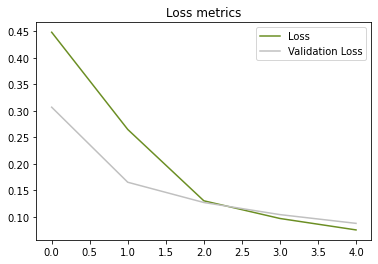

In [432]:
plt.plot(rnn.history.history["loss"], label="Loss", color=colors[0])
plt.plot(rnn.history.history["val_loss"], label="Validation Loss", color=colors[1])
plt.title("Loss metrics")
plt.legend()
plt.show()

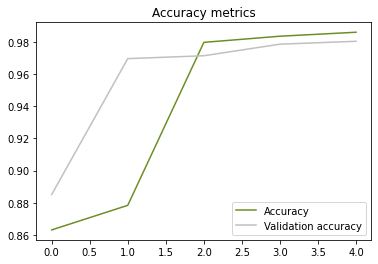

In [433]:
plt.plot(rnn.history.history["accuracy"], label="Accuracy", color=colors[0])
plt.plot(rnn.history.history["val_accuracy"], label="Validation accuracy", color=colors[1])
plt.title("Accuracy metrics")
plt.legend()
plt.show()

In [449]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rnn.predict(X_test)

print(accuracy_score(y_test.astype('int'), y_pred.astype('int')))

0.8691756272401434


**NEW PREDICTIONS**

---



In [482]:
output = rnn.predict(new_message)

In [483]:
def prediction(output):
   if output[0][0] > 0.5:
     return "spam"
   else:
     return "not_spam"

In [484]:
prediction(output)

'spam'